In [1]:
import cv2 as cv
import time
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
from scipy import ndimage, signal


In [2]:
img = cv.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Books.JPG")
img = np.uint32(img)

In [3]:
print(img.shape)

(1280, 960, 3)


In [8]:
def show_heatmap(mat, pl=plt):
    pl.imshow(mat, cmap='hot', interpolation='nearest')

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def get_edge(image, FILTER_SIZE=9, SHOW_FILTER=False):
    
    gauss1d = np.array(cv.getGaussianKernel(FILTER_SIZE + 2, FILTER_SIZE/3, cv.CV_32F))
    d_gauss1d = gauss1d[1:] - gauss1d[:-1]
    gauss2d = np.dot(gauss1d,  gauss1d.transpose())
    
    d_gauss1d_ver_col = d_gauss1d[:-1]
    d_gauss1d_ver_row = gauss1d[1:-1].transpose()
    d_gauss1d_hor_col = gauss1d[1:-1]
    d_gauss1d_hor_row = d_gauss1d[:-1].transpose()
    
    
    d_gauss2d_x2 = np.dot(d_gauss1d_hor_col, d_gauss1d_hor_row)
    d_gauss2d_y2 = np.dot(d_gauss1d_ver_col, d_gauss1d_ver_row)
    d_gauss2d_x = gauss2d[:, 1:] - gauss2d[:, :-1]
    d_gauss2d_y = gauss2d[1:, :] - gauss2d[:-1, :]
    d_gauss2d_x = d_gauss2d_x[1:-1, :-1]
    d_gauss2d_y = d_gauss2d_y[:-1, 1:-1]
    
    
    if SHOW_FILTER:
        print("different of our ver, hor filter by directly making and using row, col filters:")
        print(len(np.argwhere(np.abs(d_gauss2d_x - d_gauss2d_x2) > 0.001)))
        print(len(np.argwhere(np.abs(d_gauss2d_y - d_gauss2d_y2) > 0.001)))
        
        print("our 2d gauss filter")
        _, axs = plt.subplots(1, 1, figsize=(6, 6))
        show_heatmap(gauss2d, axs)
        plt.show()
        
        _, axs = plt.subplots(1, 2, figsize=(6, 6))
        axs = axs.flatten()
        print("our horizontal filter(derive of gauss filter in x)")
        show_heatmap(d_gauss2d_x, axs[0])
        print("our vertical filter(derive of gauss filter in y)")
        show_heatmap(d_gauss2d_y, axs[1])
        plt.show()
        
        _, axs = plt.subplots(1, 2, figsize=(6, 6))
        axs = axs.flatten()
        print("our horizontal-col filter")
        show_heatmap(d_gauss1d_hor_col, axs[0])
        print("our horizontal-row filter")
        show_heatmap(d_gauss1d_hor_row, axs[1])
        plt.show()
        
        _, axs = plt.subplots(1, 2, figsize=(6, 6))
        axs = axs.flatten()
        print("our vertical-col filter")
        show_heatmap(d_gauss1d_ver_col, axs[0])
        print("our vertical-row filter")
        show_heatmap(d_gauss1d_ver_row, axs[1])
        plt.show()
        
        _, axs = plt.subplots(1, 2, figsize=(6, 6))
        axs = axs.flatten()
        print("our horizontal filter by using column and row filter")
        show_heatmap(d_gauss2d_x2, axs[0])
        print("our vertical filter by using column and row filter")
        show_heatmap(d_gauss2d_y2, axs[1])
        plt.show()
        

#     d_img_x = (np.abs(cv.filter2D(np.uint16(img), cv.CV_16U, d_gauss2d_x)))
#     d_img_y = (np.abs(cv.filter2D(np.uint16(img), cv.CV_16U, d_gauss2d_y)))
    
#     d_gauss1d_ver_col = np.reshape(d_gauss1d[:-1], (1,-1))
#     d_gauss1d_ver_row = np.reshape(gauss1d[1:-1].transpose(), (1,-1))
#     d_gauss1d_hor_col = np.reshape(gauss1d[1:-1], (1,-1))
#     d_gauss1d_hor_row = np.reshape(d_gauss1d[:-1].transpose(), (1,-1))
    
    conv_x = np.abs(ndimage.filters.convolve(image, d_gauss2d_x, mode="nearest"))
    conv_y = np.abs(ndimage.filters.convolve(image, d_gauss2d_y, mode="nearest"))
    conv_hor_row = np.abs(ndimage.filters.convolve(image, d_gauss1d_hor_row, mode="nearest"))
    conv_hor_col = np.abs(ndimage.filters.convolve(conv_hor_row, d_gauss1d_hor_col, mode="nearest"))
    conv_ver_row = np.abs(ndimage.filters.convolve(image, d_gauss1d_ver_row, mode="nearest"))
    conv_ver_col = np.abs(ndimage.filters.convolve(conv_ver_row, d_gauss1d_ver_col, mode="nearest"))
    
#     signal.convolve2d(, , boundary='symm', mode='same')
    
    return conv_x, conv_y, conv_hor_col, conv_hor_row, conv_ver_col, conv_ver_row

<div dir="rtl">
برای پیدا کردن نقاط لبه، از فیلتر مشتق گاوس استفاده کردیم و مقدار سیگمای ۳ برای فیلتر با سایز ۹در۹، خروجی مناسبی ارائه داد
</div>

<div dir="rtl">
در اینجا ما ابتدا تابع یکبعدی گاوس را ساخته و سپس با ضرب ماتریسی آن را دو بعدی می کنیم
</div>
<div dir="rtl">
در اینجا ما ابتدا تابع یکبعدی گاوس را ساخته و سپس با ضرب ماتریسی آن را دو بعدی می کنیم
</div>

g = 1 dimention gauss
gauss2d = $ g\times g^T $

<div dir="rtl">
تابع پیدا کردن لبه، طبق روند گفته شده در تمرین به صورت عمودی، افقی و چهار فیلتر سطری ستونی، عملیات کانوالو را انجام می دهد و در خروجی به ترتیب نتیجه افقی، عمودی، ستونی افقی، سطری افقی، ستونی عمودی و سطری عمودی را بر می گرداند
</div>

different of our ver, hor filter by directly making and using row, col filters:
0
0
our 2d gauss filter


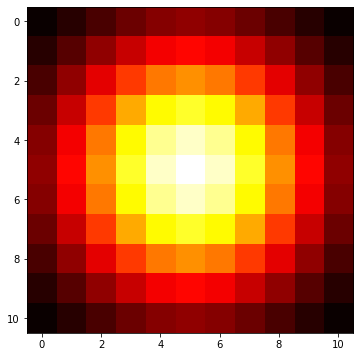

our horizontal filter(derive of gauss filter in x)
our vertical filter(derive of gauss filter in y)


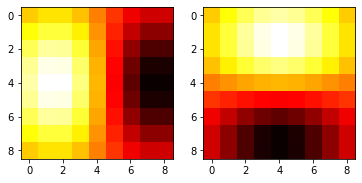

our horizontal-col filter
our horizontal-row filter


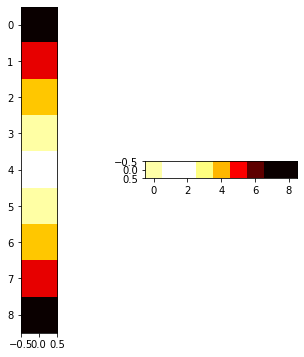

our vertical-col filter
our vertical-row filter


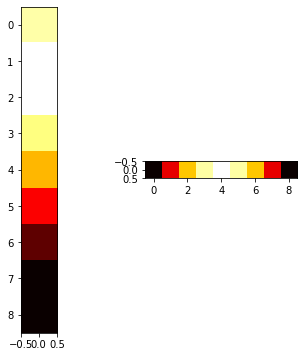

our horizontal filter by using column and row filter
our vertical filter by using column and row filter


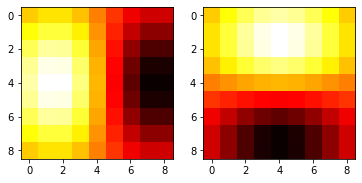

12707
762643
1.5707963267948966 0.0


True

In [10]:
img_r = img[:, :, 0]
img_g = img[:, :, 1]
img_b = img[:, :, 2]

FILTER_SIZE = 9
EDGE_THRESH = 7
edge_r = np.minimum(get_edge(img_r, FILTER_SIZE, True), 255)
edge_g = np.minimum(get_edge(img_g, FILTER_SIZE), 255)
edge_b = np.minimum(get_edge(img_b, FILTER_SIZE), 255)

edge_x = np.maximum(np.maximum(edge_r[0], edge_g[0]), edge_b[0])
cv.imwrite("./Q1-05-hor.jpg", np.uint8(edge_x))
edge_y = np.maximum(np.maximum(edge_r[1], edge_g[1]), edge_b[1])
cv.imwrite("./Q1-06-ver.jpg", np.uint8(edge_y))


edge_hor_col = np.maximum(np.maximum(edge_r[2], edge_g[2]), edge_b[2])
cv.imwrite("./Q1-03-hor-col.jpg", np.uint8(edge_hor_col))
edge_hor_row = np.maximum(np.maximum(edge_r[3], edge_g[3]), edge_b[3])
cv.imwrite("./Q1-01-hor-row.jpg", np.uint8(edge_hor_row))
edge_ver_col = np.maximum(np.maximum(edge_r[4], edge_g[4]), edge_b[4])
cv.imwrite("./Q1-04-ver-col.jpg", np.uint8(edge_ver_col))
edge_ver_row = np.maximum(np.maximum(edge_r[5], edge_g[5]), edge_b[5])
cv.imwrite("./Q1-02-ver-row.jpg", np.uint8(edge_ver_row))

print(len(np.argwhere(edge_ver_col - edge_y>10)))
print(len(np.argwhere(edge_hor_col - edge_x>10)))

grad = np.hypot(np.uint32(edge_x), np.uint32(edge_y))
cv.imwrite("./Q1-07-grad-map.jpg", np.uint8(grad))
angle = np.arctan2(edge_y, edge_x)
print(np.max(angle), np.min(angle))
cv.imwrite("./Q1-08-grad-dir.jpg", np.uint8(angle))
grad = (grad > EDGE_THRESH) * 255
cv.imwrite("./Q1-09-edge.jpg", np.uint8(grad))

<div dir="rtl">
برای جداسازی فیلترهای مشتق افقی و عمودی از قوانین مشتق و کانولوشن کمک می گیریم و می دانیم که تابع گاوس دو بعدی همان ضرب دو تابع گوس یک بعدی است که در حالت ماتریسی می شود ضرب ماتریسی یک ماتریس یک بعدی ستونی گاوسی در یک ماتریس یک بعدی سطری گاوسی.
پس برای محاسبه مشتق آن ها با توجه به خاصیت کانولوشن زیر داریم:
</div>

$ (f*g)' = (f')*g = f*(g') $

<div dir="rtl">
پس فیلتر مشتق گوسی در هر راستا، برابر است با اینکه هنگام ساخت آن، از فیلتر یکبعدی مورد نظر مشتق بگیریم که برای فیلتر عمودی می شود مشتق از فیلتر یکبعدی ستونی و فیلتر مشتق افقی برابر است با مشتق فیلتر یکبعدی سطی.

مقدار آستانه برای گرادیان که برای بدست آمدن لبه استفاده است، مقدار ۷ می باشد.
   
</div>